## Generate learning curves for each dataset

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from load_modules import *
%matplotlib inline
fpath = Path(os.getcwd())
print('Current path:', fpath)

Current path: /vol/ml/apartin/projects/dr-learning-curves/nbs


In [2]:
# Settings
drop_bad_r2fit = False
# drop_bad_r2fit = True
dpi = 200

## Path to data

In [3]:
fname = 'all_scores.csv'
# dpath = Path('../lc.out.summit.July2020/exp_1_and_2')
# dirs = glob(str(dpath/'*'))
# print(dirs)

In [4]:
# src = 'GDSC1'
# src = 'GDSC2'
# src = 'CTRP'
src = 'NCI60'

lgb_dft_label = 'dGBDT'
lgb_hpo_label = 'hGBDT'
nn0_label = 'sNN'
nn1_label = 'mNN'

if src == 'GDSC1':
    dpath = Path('../lc.out.new.r2fit_03/')
    nn0_path = Path(dpath, f'lc.gdsc1.nn_reg0.ls_hpo', fname)
    nn1_path = Path(dpath, f'lc.gdsc1.nn_reg1.ls_hpo', fname)
    lgb_path_hpo = Path(dpath, f'lc.gdsc1.lgb.ls_hpo', fname)
    lgb_path_dft = Path(dpath, f'lc.gdsc1.lgb.dflt', fname)

if src == 'GDSC2':
    dpath = Path('../lc.out.new.r2fit_03/')
    nn0_path = Path(dpath, f'lc.gdsc2.nn_reg0.ls_hpo', fname)
    nn1_path = Path(dpath, f'lc.gdsc2.nn_reg1.ls_hpo', fname)
    lgb_path_hpo = Path(dpath, f'lc.gdsc2.lgb.ls_hpo', fname)
    lgb_path_dft = Path(dpath, f'lc.gdsc2.lgb.dflt', fname)

if src == 'CTRP':
    """
    TODO!
    Consider experiment. Repeat the experiment with min_size=20000 as in GDSC.
    """
    dpath = Path('../lc.out.new.r2fit_03/')  # r2fit=0.3, min_size=50k
    # dpath = Path('../lc.out.summit.July2020/exp_1_and_2')  # r2fit=0.5, min_size=10k
    nn0_path = Path(dpath, f'lc.ctrp.nn_reg0.ls_hpo', fname)
    nn1_path = Path(dpath, f'lc.ctrp.nn_reg1.ls_hpo', fname)
    dpath = Path('../lc.out.new.r2fit_03/')
    lgb_path_hpo = Path(dpath, f'lc.ctrp.lgb.ls_hpo', fname)
    # lgb_path_hpo = Path(dpath, f'lc.ctrp.lgb.ls_hpo_20k', fname)
    lgb_path_dft = Path(dpath, f'lc.ctrp.lgb.dflt', fname)

if src == 'NCI60':
    dpath = Path('../lc.out.summit.July2020/exp_1_and_2')
    nn0_path = Path(dpath, f'lc.nci60.nn_reg0.random.ls_hpo', fname)
    nn1_path = Path(dpath, f'lc.nci60.nn_reg1.random.ls_hpo', fname)
    dpath = Path('../lc.out.nci60.lgb')
    lgb_path_hpo = Path(dpath, 'lc.nci60.lgb.ls_hpo', fname)
    lgb_path_dft = Path(dpath, 'lc.nci60.lgb.dflt', fname)

In [5]:
outpath = fpath/f'single_src_multi_model'
os.makedirs(outpath, exist_ok=True)

## Load data

In [6]:
lgb_dft = load_data(lgb_path_dft, tr_set='te');
lgb_hpo = load_data(lgb_path_hpo, tr_set='te');
nn0 = load_data(nn0_path, tr_set='te');
nn1 = load_data(nn1_path, tr_set='te');

In [7]:
print_count(aa=lgb_dft)
print_count(aa=lgb_hpo)
print_count(aa=nn0)
print_count(aa=nn1)

,tr_size,one
0,10,20
1,12,20
2,15,20
3,19,20
4,24,20
5,31,20
6,39,20
7,48,20
8,61,20
9,77,20


,tr_size,one
0,100000,20
1,123635,20
2,152858,20
3,188988,20
4,233657,20
5,288884,20
6,357164,20
7,441584,20
8,545956,20
9,674999,20


,tr_size,one
0,100000,20
1,118957,20
2,141508,20
3,168334,20
4,200246,19
5,238207,20
6,283365,20
7,337084,20
8,369806,2
9,400986,20


,tr_size,one
0,100000,20
1,118957,20
2,141508,20
3,168334,20
4,200246,20
5,238207,20
6,283365,20
7,337084,20
8,400986,20
9,477002,20


In [8]:
if drop_bad_r2fit:
    nn0 = drop_bad_r2(nn0)
    nn1 = drop_bad_r2(nn1)
    lgb_hpo = drop_bad_r2(lgb_hpo)
    lgb_dft = drop_bad_r2(lgb_dft)

In [9]:
# def calc_gof(y, yfit):
#     from sklearn import metrics
#     gof = {}
#     rmse = sqrt( metrics.mean_squared_error(y, yfit) )
#     mae = metrics.mean_absolute_error(y, yfit)
#     r2 = metrics.r2_score(y, yfit)
#     gof['rmse'] = rmse
#     gof['mae'] = mae
#     gof['r2'] = r2
#     return gof

In [10]:
# NCI60: remove bad samples
if src == 'NCI60':
    # np.unique(sorted(nn0.tr_size))
    nn0 = nn0[ ~nn0['tr_size'].isin([369806, 499618, 580947, 610743, 625000]) ].reset_index(drop=True)
    nn1 = nn1[ ~nn1['tr_size'].isin([369806, 499618, 580947, 610743, 625000]) ].reset_index(drop=True)

## Raw plots

In [11]:
# Global plotting params
# -------------------------------
met = 'mean_absolute_error';  # startParams = {'a': 1.2, 'b': -0.4, 'c': 0.04}
# met = 'mcc';  # startParams = {'a': 1.2, 'b': 0.4, 'c': 0.8}

t_set = 'te'
xtick_scale = 'log2'
ytick_scale = 'log2'
# xtick_scale = 'linear'
# ytick_scale = 'linear'

kwargs = {'metric_name': met,
          'tr_set': t_set,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale,
          'plot_median': True}

legend_fontsize = 12

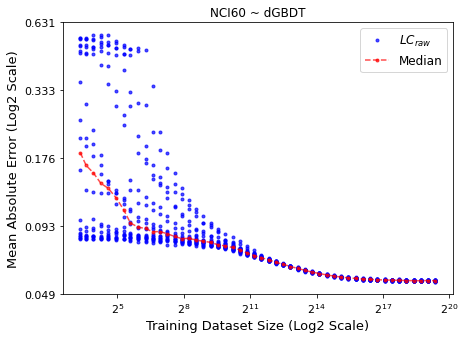

In [12]:
# Plot dGBDT (lgb_dft)
# -------------------------------
if lgb_dft is not None:
    kwargs.update({'title': f'{src} ~ {lgb_dft_label}'})
    ax = lc_plots.plot_lc_single_metric(lgb_dft, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

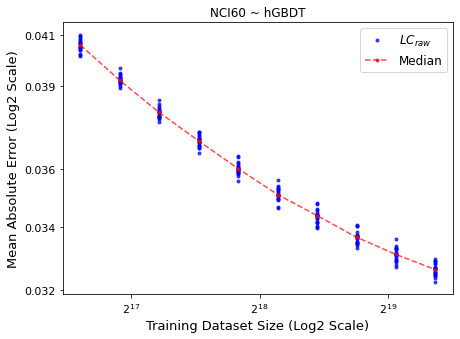

In [13]:
# Plot hGBDT (lgb_hpo)
# -------------------------------
if lgb_hpo is not None:
    kwargs.update({'title': f'{src} ~ {lgb_hpo_label}'})
    ax = lc_plots.plot_lc_single_metric(lgb_hpo, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

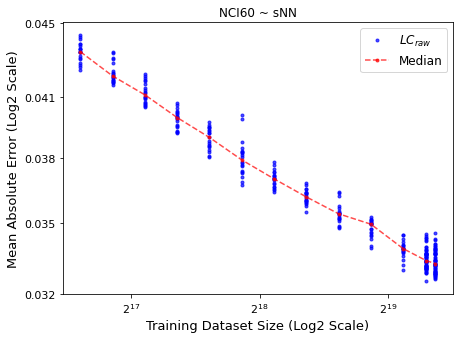

In [14]:
# Plot sNN (nn0)
# -------------------------------
if nn0 is not None:
    kwargs.update({'title': f'{src} ~ {nn0_label}'})
    ax = lc_plots.plot_lc_single_metric(nn0, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

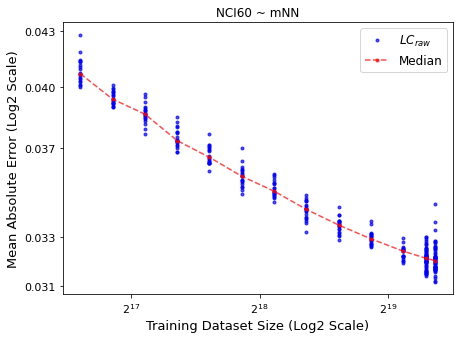

In [15]:
# Plot mNN (nn1)
# -------------------------------
if nn1 is not None:
    kwargs.update({'title': f'{src} ~ {nn1_label}'})
    ax = lc_plots.plot_lc_single_metric(nn1, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

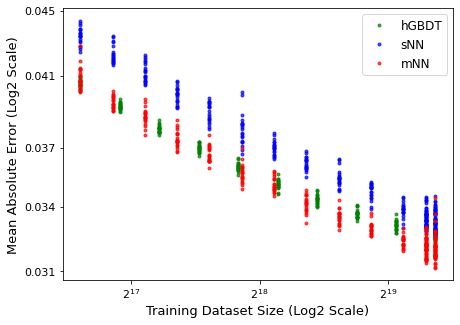

In [16]:
# Plot
# -------------------------------
ax = None
kwargs = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale}

# if lgb_dft is not None:
#     lgb = lgb_dft
#     lgb = lgb[ lgb.metric==met ].reset_index(drop=True)
#     ax = lc_plots.plot_lc(x=lgb['tr_size'].values, y=lgb['score'].values,
#                           color='m', label=f'{lgb_dft_label}', **kwargs, ax=ax);

if lgb_hpo is not None:
    lgb = lgb_hpo
    lgb = lgb[ lgb.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=lgb['tr_size'].values, y=lgb['score'].values,
                          color='g', label=f'{lgb_hpo_label}', **kwargs, ax=ax);

if nn0 is not None:
    nn0 = nn0[ nn0.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn0['tr_size'].values, y=nn0['score'].values,
                          color='b', label=f'{nn0_label}', **kwargs, ax=ax);

if nn1 is not None:
    nn1 = nn1[ nn1.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn1['tr_size'].values, y=nn1['score'].values,
                          color='r', label=f'{nn1_label}', **kwargs, ax=ax);

ax.legend(frameon=True, fontsize=legend_fontsize, loc='best');
ax.grid(False)

In [17]:
# nn0[nn0.tr_size == nn0.tr_size.max()].score.values
# nn1[nn1.tr_size == nn1.tr_size.max()].score.values

## Fitting

In [18]:
# Split dfit and dext
if src == 'GDSC1':
    x_fit_mn = 10000; x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}

elif src == 'GDSC2':
    x_fit_mn = 10000; x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}
    
elif src == 'CTRP':
    x_fit_mn = 10000; x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}    
    
elif src == 'NCI60':    
    # x_fit_mn = 2**15; x_fit_mx = None
    x_fit_mn = 100000; x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}

dfit_nn0 = fit_data(nn0, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_nn1 = fit_data(nn1, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_lgb_hpo = fit_data(lgb_hpo, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_lgb_dft = fit_data(lgb_dft, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)

In [19]:
# Percentage improvement as compared to dGBDT
# ------------------------------------------------------
display(dfit_lgb_dft.iloc[-1:, :])
display(dfit_lgb_hpo.iloc[-1:, :])
display(dfit_nn0.iloc[-1:, :])
display(dfit_nn1.iloc[-1:, :])

v_dGBDT = dfit_lgb_dft.loc[:,'y'].values[-1]
v_hGBDT = dfit_lgb_hpo.loc[:,'y'].values[-1]
v_sNN = dfit_nn0.loc[:,'y'].values[-1]
v_mNN = dfit_nn1.loc[:,'y'].values[-1]

print('hGBDT improvement: {}'.format( np.around((v_dGBDT - v_hGBDT)/v_dGBDT * 100, 2) ))
print('sNN   improvement: {}'.format( np.around((v_dGBDT -   v_sNN)/v_dGBDT * 100, 2) ))
print('mNN   improvement: {}'.format( np.around((v_dGBDT -   v_mNN)/v_dGBDT * 100, 2) ))

,tr_size,y,w
8,674999,0.055406,1.0


,tr_size,y,w
9,674999,0.032634,1.0


,tr_size,y,w
12,674999,0.033246,1.0


,tr_size,y,w
12,674999,0.03202,1.0


hGBDT improvement: 41.1
sNN   improvement: 40.0
mNN   improvement: 42.21


In [20]:
pnts_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.5, 'ls': '', 'marker': '.'}
fit_args = {'metric_name': met, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'alpha': 0.5, 'ls': '--', 'marker': ''}

R[write to console]: Loading required package: broom

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




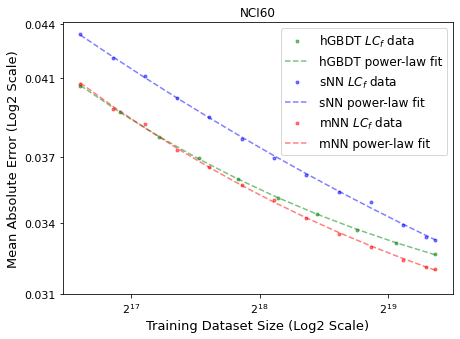

In [21]:
ax = None
fit_method = 'old'
# fit_method = 'new'

# -----------------------------
# dGBDT (LGB Default)
# -----------------------------
# if lgb_dft is not None:
#     aa = dfit_lgb_dft
#     name = lgb_dft_label
#     color = 'm'

#     xf = aa['tr_size'].values
#     yf = aa['y'].values
    
#     if fit_method == 'new':
#         cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
#         xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
#         cc_lgb_dft = cc
#     else:
#         # Old fit method (see single single_src.ipynb)  
#         prms_lgb_dft = fit_params(x=xf, y=yf)
#         yf_plot = biased_powerlaw(xf, **prms_lgb_dft)
#         xf_plot = xf
    
#     ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} data')
#     ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} fit')

# -----------------------------
# hGBDT (LGB HPO)
# -----------------------------
if lgb_hpo is not None:
    aa = dfit_lgb_hpo    
    name = lgb_hpo_label
    color = 'g'

    xf = aa['tr_size'].values
    yf = aa['y'].values

    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        # xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
        xf_plot, yf_plot = cc.calc_fit( x=xf )
        cc_lgb_hpo = cc
    else:    
        # Old fit method (see single single_src.ipynb) 
        prms_lgb_hpo = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_lgb_hpo)
        xf_plot = xf
        
    gof_lgb_hpo = calc_gof(yf, yf_plot)
    gof_lgb_hpo['model'] = 'hGBDT'
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$ data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit') 

# -----------------------------    
# sNN (NN0)
# -----------------------------
if nn0 is not None:
    aa = dfit_nn0    
    name = nn0_label
    color = 'b'
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        # xf_plot, yf_plot = cc_nn0.calc_fit( x1=xf[0], x2=xf[-1] )
        xf_plot, yf_plot = cc.calc_fit( x=xf )
        cc_nn0 = cc
    else:
        # Old fit method (see single single_src.ipynb)  
        prms_nn0 = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_nn0)
        xf_plot = xf   
        
    gof_nn0 = calc_gof(yf, yf_plot)
    gof_nn0['model'] = 'sNN'
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$ data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit')

# -----------------------------    
# mNN (NN1)
# -----------------------------
if nn1 is not None:
    aa = dfit_nn1    
    name = nn1_label
    color = 'r'
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        # xf_plot, yf_plot = cc_nn1.calc_fit( x1=xf[0], x2=xf[-1] )
        xf_plot, yf_plot = cc.calc_fit( x=xf )
        cc_nn1 = cc        
    else:
        # Old fit method (see single single_src.ipynb) 
        prms_nn1 = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_nn1)
        xf_plot = xf
    
    gof_nn1 = calc_gof(yf, yf_plot)
    gof_nn1['model'] = 'mNN'
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$ data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit')


ax.set_title(f'{src}')
ax.legend(frameon=True, fontsize=12, loc='best')
ax.grid(False)
plt.savefig(outpath/f'{src}_fits.png', dpi=dpi)

In [22]:
print(gof_lgb_hpo)
print(gof_nn0)
print(gof_nn1)

{'rmse': 2.613646153888708e-05, 'mae': 2.2951629894573527e-05, 'r2': 0.9998946525600035, 'model': 'hGBDT'}
{'rmse': 9.847964473573313e-05, 'mae': 6.984441482476375e-05, 'r2': 0.9990921271557222, 'model': 'sNN'}
{'rmse': 8.479812418547246e-05, 'mae': 6.514825972457883e-05, 'r2': 0.9990859423816446, 'model': 'mNN'}


In [23]:
gof_df = pd.DataFrame([gof_lgb_hpo, gof_nn0, gof_nn1])
gof_df.to_csv(outpath/f'gof_{src}.csv', index=False)
display(gof_df)

,rmse,mae,r2,model
0,0.000026,0.000023,0.999895,hGBDT
1,0.000098,0.000070,0.999092,sNN
2,0.000085,0.000065,0.999086,mNN


In [24]:
# print('lgb_dft')
# display(cc_lgb_dft.coefs)
print('lgb_hpo')
display(cc_lgb_hpo.coefs)
print('nn0')
display(cc_nn0.coefs)
print('nn1')
display(cc_nn1.coefs)

lgb_hpo


NameError: name 'cc_lgb_hpo' is not defined

In [ ]:
ax = None
# fit_method = 'old'
fit_method = 'new'

src = 'GDSC1'
# src = 'GDSC2'
# src = 'CTRP'
# src = 'NCI60'

if src == 'GDSC1':
    data=gdsc1; name='GDSC1'; x_fit_mn=1000; x_fit_mx=None;
# data=gdsc2; name='GDSC2'; x_fit_mn=1000; x_fit_mx=None;
# data=ctrp; name='CTRP'; x_fit_mn=1000; x_fit_mx=None;
# data=nci; name='NCI-60'; x_fit_mn=10000; x_fit_mx=None; # startParams={'a': 2.5, 'b': -0.6, 'c': 0.05}

dfit_nn0 = fit_data(nn0, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)

# data = dfit_lgb_dft
# aa = fit_data(data, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
# dfit_all = fit_data(data, x_fit_mn=0, x_fit_mx=x_fit_mx)
aa = dfit_lgb_dft

# aa = dfit_lgb_dft
name = lgb_dft_label
color = 'm'

xf = aa['tr_size'].values
yf = aa['y'].values

if fit_method == 'new':
    cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
    xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
    cc_lgb_dft = cc
else:
    # Old fit method (see single single_src.ipynb)  
    prms_lgb_dft = fit_params(x=xf, y=yf)
    yf_plot = biased_powerlaw(xf, **prms_lgb_dft)
    xf_plot = xf

# ----------
# Fit points
# ----------
ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label='$LC_{f}$ data')
ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'Power-law fit')

ax.set_title(f'{name}')
ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
ax.grid(False)

In [ ]:
# display(prms_nn0)
# display(prms_nn1)
# display(prms_lgb_hpo)
# display(prms_lgb_dft)

In [ ]:
# aa = nn0
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa

In [ ]:
# aa = nn1
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa

In [ ]:
# aa = lgb_hpo
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa

In [25]:
# aa = lgb_dft
# aa['std'] = aa['score']
# aa['min'] = aa['score']
# aa['max'] = aa['score']
# aa = aa.groupby(['tr_size']).agg({'score': 'median', 'std': 'std', 'min': 'min', 'max': 'max'}).reset_index()
# score_name = f'{met}_median'
# aa = aa.rename(columns={'score': score_name})
# aa['%'] = aa['std']/aa[score_name]
# aa